# Import

In [1]:
import sys
nephosemdir = "D:/OneDrive - KU Leuven/KUL/nephosem"
tokens_coordinates_dir = 'tokens_coordinates'
soc_analysis_dir = 'soc_analysis'

sys.path.append(nephosemdir)
sys.path.append(tokens_coordinates_dir)
sys.path.append(soc_analysis_dir)

mydir = f"./"

In [2]:
# tokens_coordinates
import get_model_data
import get_token_ids
import importlib
# Import the module before reloading
importlib.reload(get_token_ids)
importlib.reload(get_model_data)

<module 'get_model_data' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\tokens_coordinates\\get_model_data.py'>

In [3]:
# Nephosem
from nephosem import ConfigLoader, TypeTokenMatrix
conf = ConfigLoader()
settings = conf.update_config('config.ini')

In [12]:
# soc_analysis
import soc_analysis
import importlib
# Import the module before reloading
importlib.reload(soc_analysis)

<module 'soc_analysis' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\soc_analysis\\soc_analysis.py'>

In [13]:
analyser = soc_analysis.SOCAnalyser()
token = 'time_final_no_det'
model = 'time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA'

# Get the coordinates of the tokens

In [6]:
# Get the coordinates, senses of the tokens of the model.
get_model_data.get_model_data(token, model)

The coordinates of time_final_no_det-time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA were extracted
The senses of time_final_no_det-time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA were added
The model data was extracted


In [7]:
# Visualisation to get the token ids
get_token_ids.get_token_ids(token, model)

Open the app in your browser (http://127.0.0.1:8050).


# Get the sub-matrix of the SOC matrix

In [15]:
# List of tokens copied from the token_coordinate
token_list = ['time/NN/Encow_sample_4340/41', 'time/NN/Encow_sample_27616/24', 'time/NN/Encow_sample_20274/16', 'time/NN/Encow_sample_31654/62', 'time/NN/Encow_sample_20185/38', 'time/NN/Encow_sample_2091/31', 'time/NN/Encow_sample_19697/12', 'time/NN/Encow_sample_2958/92', 'time/NN/Encow_sample_28176/41', 'time/NN/Encow_sample_29404/44', 'time/NN/Encow_sample_23189/18', 'time/NN/Encow_sample_3829/43', 'time/NN/Encow_sample_11344/13', 'time/NN/Encow_sample_28496/50', 'time/NN/Encow_sample_1117/53', 'time/NN/Encow_sample_232/29', 'time/NN/Encow_sample_22361/83', 'time/NN/Encow_sample_30912/54', 'time/NN/Encow_sample_1840/58', 'time/NN/Encow_sample_3400/19', 'time/NN/Encow_sample_10232/58', 'time/NN/Encow_sample_21435/113', 'time/NN/Encow_sample_19352/39', 'time/NN/Encow_sample_20378/46', 'time/NN/Encow_sample_29404/48', 'time/NN/Encow_sample_31249/26', 'time/NN/Encow_sample_30196/39', 'time/NN/Encow_sample_17271/14']

# Name of the sense/region
sense = 'time_3'

In [14]:
# Get the full SOC matrix
model_file = f'./input/{model}.tcmx.soc.pac'
model_mtx = TypeTokenMatrix.load(model_file) # opens a matrix

# Get the submatrix of only the tokens under investigation
subset_rows = model_mtx.submatrix(row = token_list)
subset_rows.to_csv(f'./input/{sense}_SOCs.csv', sep=',')

# SOC Analysis

Elbow index: 77
Elbow SOC: Will/NP (Association Score: 0.033695682450436824)


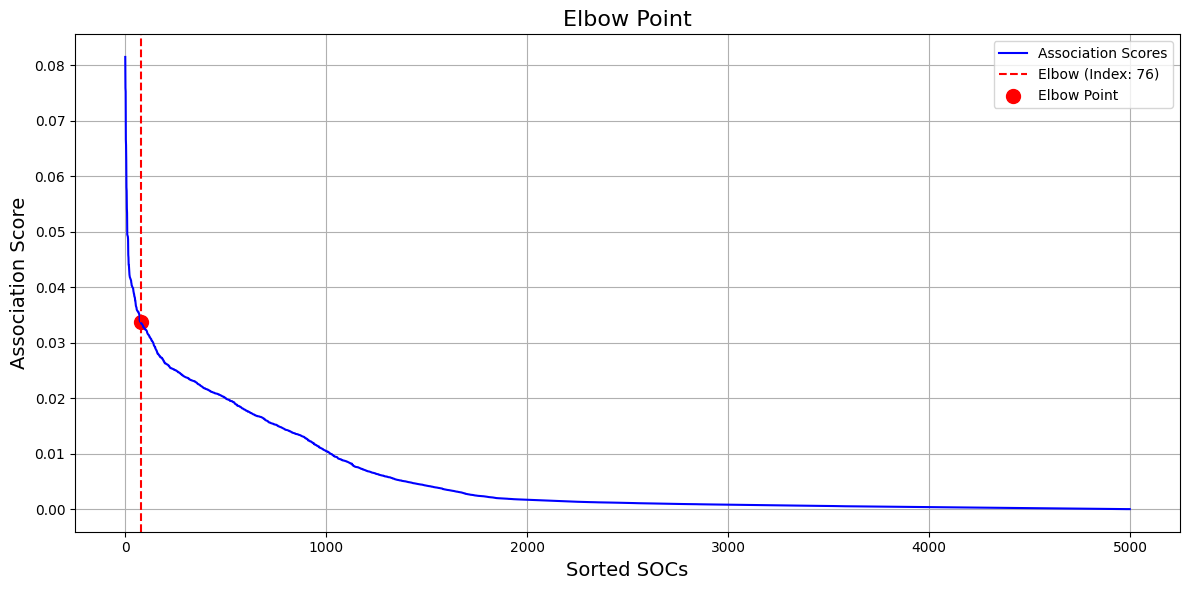

In [16]:
# Find the elbow
analyser.elbow_finder(sense)

In [17]:
# Top n SOCs
n = 77
analyser.soc_dist_vis(n)

Top 77 SOCs extracted.


In [18]:
# Get the raw context
analyser.get_context(token, sense, token_list)

Context for time_final_no_det-time_3 extracted.
